# Flags Domain

In the Flags domain, time is broken up into discrete decision periods, and the world is a square area that is broken up into a 5-by-5 grid of cells, as illustrated in Figure 1 below. 
<img src="flagworld.png">
At the beginning of each period, a robot occupies one of the available cells. It is then allowed to choose a direction of movement (up, down, left or right), and moves to the corresponding adjacent cell in that direction. However, if the chosen action would take the robot outside the boundaries of the grid, the robot does not move but remains in the current cell. So far, the problem is just like the Gridworld domain you have already encountered in your first assignment. In each run, the robot begins in state S. <br>
As illustrated in Figure 1, instead of a single destination G, there are five different flags, numbered 1, 2, 3, 4 and G, that must be collected in the correct order (first 1, then 2, etc... to G). Once the robot has collected all the  flags in the correct order and lands on cell G, the task is complete. If the robot collects the wrong flag at the wrong time (e.g. tries to collect 2 first, then 1...), the robot does not have to start over. Instead, the robot is penalized for taking this action, and the wrong flag is not collected (you may assume for training purposes, that the flags that have already been collected so far are kept). The main objective is to collect all the flags in the correct order in the least possible amount of time.

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import math

In [3]:
class Flags:
    def initial_state(self):
    # return the initial state of this MDP
        initial_state = (0,5,1)
        return initial_state

    def get_all_states(self):
    # return a list containing all the possible states in this MDP
        states = [
                (0,1,1),    (1,1,1),    (2,1,1),    (3,1,1),    (4,1,1),
                (0,1,2),    (1,1,2),    (2,1,2),    (3,1,2),    (4,1,2),
                (0,1,3),    (1,1,3),    (2,1,3),    (3,1,3),    (4,1,3),
                (0,1,4),    (1,1,4),    (2,1,4),    (3,1,4),    (4,1,4),
                (0,1,5),    (1,1,5),    (2,1,5),    (3,1,5),
                (0,2,1),    (1,2,1),    (2,2,1),    (3,2,1),    (4,2,1),
                (0,2,2),                (2,2,2),    (3,2,2),    (4,2,2),
                (0,2,3),    (1,2,3),    (2,2,3),    (3,2,3),    (4,2,3),
                (0,2,4),    (1,2,4),    (2,2,4),    (3,2,4),    (4,2,4),
                (0,2,5),    (1,2,5),    (2,2,5),    (3,2,5),    (4,2,5),
                (0,3,1),    (1,3,1),    (2,3,1),    (3,3,1),    (4,3,1),
                (0,3,2),    (1,3,2),    (2,3,2),    (3,3,2),    (4,3,2),
                (0,3,3),    (1,3,3),    (2,3,3),    (3,3,3),    (4,3,3),
                (0,3,4),    (1,3,4),    (2,3,4),    (3,3,4),    (4,3,4),
                (0,3,5),    (1,3,5),    (2,3,5),    (3,3,5),    (4,3,5),
                (0,4,1),    (1,4,1),                (3,4,1),    (4,4,1),
                (0,4,2),    (1,4,2),    (2,4,2),    (3,4,2),    (4,4,2),
                (0,4,3),    (1,4,3),    (2,4,3),    (3,4,3),    (4,4,3),
                (0,4,4),    (1,4,4),    (2,4,4),    (3,4,4),    (4,4,4),
                            (1,4,5),    (2,4,5),    (3,4,5),    (4,4,5),
                (0,5,1),    (1,5,1),    (2,5,1),    (3,5,1),    (4,5,1),
                (0,5,2),    (1,5,2),    (2,5,2),    (3,5,2),    (4,5,2),
                (0,5,3),    (1,5,3),    (2,5,3),    (3,5,3),    (4,5,3),
                (0,5,4),    (1,5,4),    (2,5,4),    (3,5,4),    (4,5,4),
                (0,5,5),    (1,5,5),    (2,5,5),                (4,5,5),

                (5,1,5) # TERMINAL STATE
                ]
        return states
    
    def actions(self):
    # return possible actions
        actions = ['U','D','L','R']
        return actions
    
    def next_state(self, state, action):
        stateSpace ={ # ( number of flags captured, row index, column index )
                    (0,1,1):{'U':(0,1,1),'D':(0,2,1),'L':(0,1,1),'R':(0,1,2)},
                    (0,1,2):{'U':(0,1,2),'D':(0,2,2),'L':(0,1,1),'R':(0,1,3)},
                    (0,1,3):{'U':(0,1,3),'D':(0,2,3),'L':(0,1,2),'R':(0,1,4)},
                    (0,1,4):{'U':(0,1,4),'D':(0,2,4),'L':(0,1,3),'R':(0,1,5)},
                    (0,1,5):{'U':(0,1,5),'D':(0,2,5),'L':(0,1,4),'R':(0,1,5)},
                    (0,2,1):{'U':(0,1,1),'D':(0,3,1),'L':(0,2,1),'R':(0,2,2)},
                    (0,2,2):{'U':(0,1,2),'D':(0,3,2),'L':(0,2,1),'R':(0,2,3)},
                    (0,2,3):{'U':(0,1,3),'D':(0,3,3),'L':(0,2,2),'R':(0,2,4)},
                    (0,2,4):{'U':(0,1,4),'D':(0,3,4),'L':(0,2,3),'R':(0,2,5)},
                    (0,2,5):{'U':(0,1,5),'D':(0,3,5),'L':(0,2,4),'R':(0,2,5)},
                    (0,3,1):{'U':(0,2,1),'D':(0,4,1),'L':(0,3,1),'R':(0,3,2)},
                    (0,3,2):{'U':(0,2,2),'D':(0,4,2),'L':(0,3,1),'R':(0,3,3)},
                    (0,3,3):{'U':(0,2,3),'D':(0,4,3),'L':(0,3,2),'R':(0,3,4)},
                    (0,3,4):{'U':(0,2,4),'D':(0,4,4),'L':(0,3,3),'R':(0,3,5)},
                    (0,3,5):{'U':(0,2,5),'D':(1,4,5),'L':(0,3,4),'R':(0,3,5)}, # flag captured {'D'}
                    (0,4,1):{'U':(0,3,1),'D':(0,5,1),'L':(0,4,1),'R':(0,4,2)},
                    (0,4,2):{'U':(0,3,2),'D':(0,5,2),'L':(0,4,1),'R':(0,4,3)},
                    (0,4,3):{'U':(0,3,3),'D':(0,5,3),'L':(0,4,2),'R':(0,4,4)},
                    (0,4,4):{'U':(0,3,4),'D':(0,5,4),'L':(0,4,3),'R':(1,4,5)}, # flag captured {'R'}
                    (0,5,1):{'U':(0,4,1),'D':(0,5,1),'L':(0,5,1),'R':(0,5,2)},
                    (0,5,2):{'U':(0,4,2),'D':(0,5,2),'L':(0,5,1),'R':(0,5,3)},
                    (0,5,3):{'U':(0,4,3),'D':(0,5,3),'L':(0,5,2),'R':(0,5,4)},
                    (0,5,4):{'U':(0,4,4),'D':(0,5,4),'L':(0,5,3),'R':(0,5,5)},
                    (0,5,5):{'U':(1,4,5),'D':(0,5,5),'L':(0,5,4),'R':(0,5,5)}, # flag captured {'U'}
                    
                    (1,1,1):{'U':(1,1,1),'D':(1,2,1),'L':(1,1,1),'R':(1,1,2)},
                    (1,1,2):{'U':(1,1,2),'D':(2,2,2),'L':(1,1,1),'R':(1,1,3)}, # flag captured {'D'}
                    (1,1,3):{'U':(1,1,3),'D':(1,2,3),'L':(1,1,2),'R':(1,1,4)},
                    (1,1,4):{'U':(1,1,4),'D':(1,2,4),'L':(1,1,3),'R':(1,1,5)},
                    (1,1,5):{'U':(1,1,5),'D':(1,2,5),'L':(1,1,4),'R':(1,1,5)},
                    (1,2,1):{'U':(1,1,1),'D':(1,3,1),'L':(1,2,1),'R':(2,2,2)}, # flag captured {'R'}
                    (1,2,3):{'U':(1,1,3),'D':(1,3,3),'L':(2,2,2),'R':(1,2,4)}, # flag captured {'L'}
                    (1,2,4):{'U':(1,1,4),'D':(1,3,4),'L':(1,2,3),'R':(1,2,5)},
                    (1,2,5):{'U':(1,1,5),'D':(1,3,5),'L':(1,2,4),'R':(1,2,5)},
                    (1,3,1):{'U':(1,2,1),'D':(1,4,1),'L':(1,3,1),'R':(1,3,2)},
                    (1,3,2):{'U':(2,2,2),'D':(1,4,2),'L':(1,3,1),'R':(1,3,3)}, # flag captured {'U'}
                    (1,3,3):{'U':(1,2,3),'D':(1,4,3),'L':(1,3,2),'R':(1,3,4)},
                    (1,3,4):{'U':(1,2,4),'D':(1,4,4),'L':(1,3,3),'R':(1,3,5)},
                    (1,3,5):{'U':(1,2,5),'D':(1,4,5),'L':(1,3,4),'R':(1,3,5)},
                    (1,4,1):{'U':(1,3,1),'D':(1,5,1),'L':(1,4,1),'R':(1,4,2)},
                    (1,4,2):{'U':(1,3,2),'D':(1,5,2),'L':(1,4,1),'R':(1,4,3)},
                    (1,4,3):{'U':(1,3,3),'D':(1,5,3),'L':(1,4,2),'R':(1,4,4)},
                    (1,4,4):{'U':(1,3,4),'D':(1,5,4),'L':(1,4,3),'R':(1,4,5)},
                    (1,4,5):{'U':(1,3,5),'D':(1,5,5),'L':(1,4,4),'R':(1,4,5)},
                    (1,5,1):{'U':(1,4,1),'D':(1,5,1),'L':(1,5,1),'R':(1,5,2)},
                    (1,5,2):{'U':(1,4,2),'D':(1,5,2),'L':(1,5,1),'R':(1,5,3)},
                    (1,5,3):{'U':(1,4,3),'D':(1,5,3),'L':(1,5,2),'R':(1,5,4)},
                    (1,5,4):{'U':(1,4,4),'D':(1,5,4),'L':(1,5,3),'R':(1,5,5)},
                    (1,5,5):{'U':(1,4,5),'D':(1,5,5),'L':(1,5,4),'R':(1,5,5)},
                    
                    (2,1,1):{'U':(2,1,1),'D':(2,2,1),'L':(2,1,1),'R':(2,1,2)},
                    (2,1,2):{'U':(2,1,2),'D':(2,2,2),'L':(2,1,1),'R':(2,1,3)},
                    (2,1,3):{'U':(2,1,3),'D':(2,2,3),'L':(2,1,2),'R':(2,1,4)},
                    (2,1,4):{'U':(2,1,4),'D':(2,2,4),'L':(2,1,3),'R':(2,1,5)},
                    (2,1,5):{'U':(2,1,5),'D':(2,2,5),'L':(2,1,4),'R':(2,1,5)},
                    (2,2,1):{'U':(2,1,1),'D':(2,3,1),'L':(2,2,1),'R':(2,2,2)},
                    (2,2,2):{'U':(2,1,2),'D':(2,3,2),'L':(2,2,1),'R':(2,2,3)},
                    (2,2,3):{'U':(2,1,3),'D':(2,3,3),'L':(2,2,2),'R':(2,2,4)},
                    (2,2,4):{'U':(2,1,4),'D':(2,3,4),'L':(2,2,3),'R':(2,2,5)},
                    (2,2,5):{'U':(2,1,5),'D':(2,3,5),'L':(2,2,4),'R':(2,2,5)},
                    (2,3,1):{'U':(2,2,1),'D':(3,4,1),'L':(2,3,1),'R':(2,3,2)}, 
                    (2,3,2):{'U':(2,2,2),'D':(2,4,2),'L':(2,3,1),'R':(2,3,3)}, # flag captured {'D'}
                    (2,3,3):{'U':(2,2,3),'D':(2,4,3),'L':(2,3,2),'R':(2,3,4)},
                    (2,3,4):{'U':(2,2,4),'D':(2,4,4),'L':(2,3,3),'R':(2,3,5)},
                    (2,3,5):{'U':(2,2,5),'D':(2,4,5),'L':(2,3,4),'R':(2,3,5)},
                    (2,4,2):{'U':(2,3,2),'D':(2,5,2),'L':(3,4,1),'R':(2,4,3)}, # flag captured {'L'}
                    (2,4,3):{'U':(2,3,3),'D':(2,5,3),'L':(2,4,2),'R':(2,4,4)},
                    (2,4,4):{'U':(2,3,4),'D':(2,5,4),'L':(2,4,3),'R':(2,4,5)},
                    (2,4,5):{'U':(2,3,5),'D':(2,5,5),'L':(2,4,4),'R':(2,4,5)},
                    (2,5,1):{'U':(3,4,1),'D':(2,5,1),'L':(2,5,1),'R':(2,5,2)}, # flag captured {'U'}
                    (2,5,2):{'U':(2,4,2),'D':(2,5,2),'L':(2,5,1),'R':(2,5,3)},
                    (2,5,3):{'U':(2,4,3),'D':(2,5,3),'L':(2,5,2),'R':(2,5,4)},
                    (2,5,4):{'U':(2,4,4),'D':(2,5,4),'L':(2,5,3),'R':(2,5,5)},
                    (2,5,5):{'U':(2,4,5),'D':(2,5,5),'L':(2,5,4),'R':(2,5,5)},
                    
                    (3,1,1):{'U':(3,1,1),'D':(3,2,1),'L':(3,1,1),'R':(3,1,2)},
                    (3,1,2):{'U':(3,1,2),'D':(3,2,2),'L':(3,1,1),'R':(3,1,3)},
                    (3,1,3):{'U':(3,1,3),'D':(3,2,3),'L':(3,1,2),'R':(3,1,4)},
                    (3,1,4):{'U':(3,1,4),'D':(3,2,4),'L':(3,1,3),'R':(3,1,5)},
                    (3,1,5):{'U':(3,1,5),'D':(3,2,5),'L':(3,1,4),'R':(3,1,5)},
                    (3,2,1):{'U':(3,1,1),'D':(3,3,1),'L':(3,2,1),'R':(3,2,2)},
                    (3,2,2):{'U':(3,1,2),'D':(3,3,2),'L':(3,2,1),'R':(3,2,3)},
                    (3,2,3):{'U':(3,1,3),'D':(3,3,3),'L':(3,2,2),'R':(3,2,4)},
                    (3,2,4):{'U':(3,1,4),'D':(3,3,4),'L':(3,2,3),'R':(3,2,5)},
                    (3,2,5):{'U':(3,1,5),'D':(3,3,5),'L':(3,2,4),'R':(3,2,5)},
                    (3,3,1):{'U':(3,2,1),'D':(3,4,1),'L':(3,3,1),'R':(3,3,2)},
                    (3,3,2):{'U':(3,2,2),'D':(3,4,2),'L':(3,3,1),'R':(3,3,3)},
                    (3,3,3):{'U':(3,2,3),'D':(3,4,3),'L':(3,3,2),'R':(3,3,4)},
                    (3,3,4):{'U':(3,2,4),'D':(3,4,4),'L':(3,3,3),'R':(3,3,5)},
                    (3,3,5):{'U':(3,2,5),'D':(3,4,5),'L':(3,3,4),'R':(3,3,5)},
                    (3,4,1):{'U':(3,3,1),'D':(3,5,1),'L':(3,4,1),'R':(3,4,2)},
                    (3,4,2):{'U':(3,3,2),'D':(3,5,2),'L':(3,4,1),'R':(3,4,3)},
                    (3,4,3):{'U':(3,3,3),'D':(3,5,3),'L':(3,4,2),'R':(3,4,4)},
                    (3,4,4):{'U':(3,3,4),'D':(3,5,4),'L':(3,4,3),'R':(3,4,5)},
                    (3,4,5):{'U':(3,3,5),'D':(4,5,5),'L':(3,4,4),'R':(3,4,5)}, # flag captured {'D'}
                    (3,5,1):{'U':(3,4,1),'D':(3,5,1),'L':(3,5,1),'R':(3,5,2)},
                    (3,5,2):{'U':(3,4,2),'D':(3,5,2),'L':(3,5,1),'R':(3,5,3)},
                    (3,5,3):{'U':(3,4,3),'D':(3,5,3),'L':(3,5,2),'R':(3,5,4)},
                    (3,5,4):{'U':(3,4,4),'D':(3,5,4),'L':(3,5,3),'R':(4,5,5)}, # flag captured {'R'}
                    
                    (4,1,1):{'U':(4,1,1),'D':(4,2,1),'L':(4,1,1),'R':(4,1,2)},
                    (4,1,2):{'U':(4,1,2),'D':(4,2,2),'L':(4,1,1),'R':(4,1,3)},
                    (4,1,3):{'U':(4,1,3),'D':(4,2,3),'L':(4,1,2),'R':(4,1,4)},
                    (4,1,4):{'U':(4,1,4),'D':(4,2,4),'L':(4,1,3),'R':(5,1,5)}, # flag captured {'R'}
                    (4,2,1):{'U':(4,1,1),'D':(4,3,1),'L':(4,2,1),'R':(4,2,2)},
                    (4,2,2):{'U':(4,1,2),'D':(4,3,2),'L':(4,2,1),'R':(4,2,3)},
                    (4,2,3):{'U':(4,1,3),'D':(4,3,3),'L':(4,2,2),'R':(4,2,4)},
                    (4,2,4):{'U':(4,1,4),'D':(4,3,4),'L':(4,2,3),'R':(4,2,5)},
                    (4,2,5):{'U':(5,1,5),'D':(4,3,5),'L':(4,2,4),'R':(4,2,5)}, # flag captured {'U'}
                    (4,3,1):{'U':(4,2,1),'D':(4,4,1),'L':(4,3,1),'R':(4,3,2)},
                    (4,3,2):{'U':(4,2,2),'D':(4,4,2),'L':(4,3,1),'R':(4,3,3)},
                    (4,3,3):{'U':(4,2,3),'D':(4,4,3),'L':(4,3,2),'R':(4,3,4)},
                    (4,3,4):{'U':(4,2,4),'D':(4,4,4),'L':(4,3,3),'R':(4,3,5)},
                    (4,3,5):{'U':(4,2,5),'D':(4,4,5),'L':(4,3,4),'R':(4,3,5)},
                    (4,4,1):{'U':(4,3,1),'D':(4,5,1),'L':(4,4,1),'R':(4,4,2)},
                    (4,4,2):{'U':(4,3,2),'D':(4,5,2),'L':(4,4,1),'R':(4,4,3)},
                    (4,4,3):{'U':(4,3,3),'D':(4,5,3),'L':(4,4,2),'R':(4,4,4)},
                    (4,4,4):{'U':(4,3,4),'D':(4,5,4),'L':(4,4,3),'R':(4,4,5)},
                    (4,4,5):{'U':(4,3,5),'D':(4,5,5),'L':(4,4,4),'R':(4,4,5)},
                    (4,5,1):{'U':(4,4,1),'D':(4,5,1),'L':(4,5,1),'R':(4,5,2)},
                    (4,5,2):{'U':(4,4,2),'D':(4,5,2),'L':(4,5,1),'R':(4,5,3)},
                    (4,5,3):{'U':(4,4,3),'D':(4,5,3),'L':(4,5,2),'R':(4,5,4)},
                    (4,5,4):{'U':(4,4,4),'D':(4,5,4),'L':(4,5,3),'R':(4,5,5)},
                    (4,5,5):{'U':(4,4,5),'D':(4,5,5),'L':(4,5,4),'R':(4,5,5)},
                    (5,1,5):{'U':(5,1,5),'D':(5,1,5),'L':(5,1,5),'R':(5,1,5)}
                    }

        return stateSpace[state][action]
    
    def is_terminal(self, state):
    # this function should return a Boolean indicating
    # whether or not state is a terminal state ; 
    # in other words , does the game end at the specified state
    # or does the robot keep playing ?
    # TERMINAL STATE IS (5,1,5) - returns True if algo should ends o/w returns False
    # use following line in your algo to use this function
    # self.domain.is_terminal(state):
        if state == (5,1,5): return True
        else: return False
    

    def transition(self, state , action):
    # this function should simulate the intended behavior of the Flags domain
    # in particular , given the specified state and action, 
    # this function should return a tuple containing two things :
    # 1. the next state to which we are transitioning to in the next period
    # 2. the reward obtained according to your reward function when transitioning to the next state    

    #        Flag states: 
    #        1. (4,5) 
    #        2. (2,2)
    #        3. (4,1)
    #        4. (5,5)
    #        5. (1,5)
    #        - Assume punishment for visiting any of the flag states prematurely
    #        - Assume no punishment for revisiting a state that previously held a captured flag

        flagStates = [(4,5),(2,2),(4,1),(5,5),(1,5)]
        nextState = self.next_state(state,action)
        
        # state[0] = number of flags 
        if state[0] == nextState[0]:
            
            # if flag state hit prematurely: -10 
            # next spot on grid = (nextState[1], nextState[2]) = (row #, col #)
            # flagStates[state[0]:4] <- slice the list to only include the flags not yet captured
                # flagState = ordered list containing the all the flag states
                # [state[0]:4] = [number of flags captured : end of list] = subset representative of remaining flags
                # if we've captured 4 flags, we no longer have this restriction i.e. no flags left on board except goal
            if state[0] != 4 and (nextState[1],nextState[2]) in flagStates[state[0]:5]: reward = -10
            
            # if no flag captured: -1
            else: reward = -1

        # if flag captured: +25
        else: reward = 25

        return nextState, reward


# First-Visit On-Policy MC
For this algorithm, like all the others that follow, you train using the epsilon-greedy policy. You are allowed to fix the discount factor gamma to 0.99. Set the maximum length of each episode to 200 if the terminal state is not reached by this point. Training should proceed for a total of 2000 episodes. You need to experiment with the epsilon parameter in epsilon greedy. Run your experiment for different choices of this parameter in {0.01, 0:1, 0.25} and include plots in your report for each of these values. What is the best value of epsilon? Why? For each epsilon, did your algorithm converge at all? What was the final policy and Q-values that you typically obtain (typically, as in the majority of the trials)? Does this correspond to an optimal policy?
<img src="fv-on-MC.png">

In [ ]:
# your code goes here
class MonteCarlo:
    def __init__(self, domain, gamma, epsilon):
    # sets the domain instance, and all relevant parameters for each algorithm 
    # (e.g. learning rate, epsilon, etc.).

    def initialize_values(self):
    # A procedure called initialize values that initializes the Q-values to zero for all
    # states in the MDP and all relevant other counters and memory.
    
    def sample_epsilon_greedy(self):
    # takes a state of the MDP as argument and returns an action sampled 
    # according to the epsilon-greedy policy defined by the epsilon parameter 
    # set in the init method and the Q-values.
    
    def test_greedy(self): 
    # generates an episode from the MDP using the greedy policy 
    # (we are testing, so please do NOT use the epsilon-greedy policy for this!) 
    # with respect to the current Q-values, and returns G0, the discounted return 
    # starting from the initial state (please refer to your lecture or tutorial notes). 
    # This function will be used to inspect the rate at which your algorithm 
    # converges to a good policy as it trains.
    
    def train_episode(self):
    # Each algorithm has a main training loop that generates an episode from the MDP
    # according to the epsilon-greedy policy and uses this to update the Q-values. 
    # How you implement this method is up to you, but it is easiest to refer to the pseudo-code
    # of each algorithm discussed in class or in the Sutton and Barto book.
    
    def train_trial(self):
    # Training typically does not only happen for one episode, but rather for many episodes. 
    # Create a function that first initializes your Q-values using your method initialize values,
    # and then proceeds to train using a predetermined number of episodes using your method train episode 
    # In addition, at the end of each episode, you should test the greedy policy you've obtained 
    # using your method test_greedy. 
    # Keep track of this progress in a list or a numpy array, and
    # return it in this procedure once training completes
    
    """
The algorithms in model-free RL are inherently random due to the randomness of
the exploration policy and possibly the stochasticity of the MDP (not relevant here,
since it is deterministic). In order to get a better idea of how fast each algorithm
converges, practitioners typically run each algorithm independently using the same
initial conditions many times (try to do it for at least 20 trials if you can: if your
computer is too slow, you may reduce it to 10), and average the results from all the
trials. In order to do this, you will have to run your method train trial many
times. Record the per-episode performance data returned by that method over all
trials. At the end, compute both the sample mean and standard deviation over trials
for each episode. Plot these result in separate figures with episode on the x-axis and
the mean/std of returns on the y-axis.
    """

In [ ]:
"""
For each algorithm you implement, you should have another Python file that allows to
run your experiment. Here, you will have to initialize your domain, and the algorithm
with your parameter settings, and run your algorithm.
"""

# Q-Learning (Off-Policy TD)
Implement the off-policy Q-learning algorithm as discussed in class. You may fix the learning rate to alpha = 0.3 for all your experiments. Set gamma = 0.99, the maximum episode length to 200 time steps, and the number of episodes of training to 500. Experiment with epsilon in {0.01, 0.1, 0.25}, answer the same questions and provide the same information as Part B.
<img src="ql.png">
<img src="discounted-return.png">

In [9]:
# your code goes here
class QLearning:
    def __init__(self, domain, alpha, gamma, epsilon):
    # sets the domain instance, and all relevant parameters for each algorithm 
    # (e.g. learning rate, epsilon, etc.).
        self.domain = flags
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        # Added this feature to represent whether this instance has been run, if so, print out the good policy
        self.final = False
        self.policy = []

    def initialize_values(self):
    # A procedure called initialize values that initializes the Q-values to zero for all
    # states in the MDP and all relevant other counters and memory.
        self.Q = {}
        for state in self.domain.get_all_states():
            self.Q[state]={}
            for action in self.domain.actions():
                self.Q[state][action]=0
    
    def sample_greedy(self, state):
        # if more than one action have the max value, select randomly from those top actions
        top = max(self.Q[state].values())
        topmoves = [k for k, v in self.Q[state].items() if v == top]
        greedy_a = random.choice(topmoves)
        return greedy_a
        
    
    def sample_epsilon_greedy(self):
    # takes a state of the MDP as argument and returns an action sampled 
    # according to the epsilon-greedy policy defined by the epsilon parameter 
    # set in the init method and the Q-values.
        choice = np.random.choice(['policy', 'rand'], p = [(1-self.epsilon), self.epsilon])
        if choice == 'policy':
            action = self.sample_greedy(self.state)
        else:
            action = random.choice(self.domain.actions())                
        return action
    
    def test_greedy(self): 
    # generates an episode from the MDP using the greedy policy 
    # (we are testing, so please do NOT use the epsilon-greedy policy for this!) 
    # with respect to the current Q-values, and returns G0, the discounted return 
    # starting from the initial state (please refer to your lecture or tutorial notes). 
    # This function will be used to inspect the rate at which your algorithm 
    # converges to a good policy as it trains.
        self.state = self.domain.initial_state()
        terminal = False
        R = []
        i = 0
        
        # run the episode to collect data
        while not terminal and i < 200:
            S = self.state
            a = self.sample_greedy(S)
            
            # Added in a feature where it will print the policy out once the algo has been run
            print('state: ' + str(S) + ', action: ' + a) if self.final else ""
            S_next, reward = self.domain.transition(S, a)
            R.append(reward)
            self.state = S_next
            terminal = self.domain.is_terminal(self.state)
            i += 1
        # calculate G_0
        G_0 = 0
        
        for i in range(len(R)):
            G_0 = G_0 + R[i]*pow(self.gamma, i)
        return G_0
    
    def train_episode(self):
    # Each algorithm has a main training loop that generates an episode from the MDP
    # according to the epsilon-greedy policy and uses this to update the Q-values. 
    # How you implement this method is up to you, but it is easiest to refer to the pseudo-code
    # of each algorithm discussed in class or in the Sutton and Barto book.

        self.state = self.domain.initial_state()
        terminal = False
        i = 0

        while (not terminal) and i < 200:
            S = self.state
            a = self.sample_epsilon_greedy()
            S_next, reward = self.domain.transition(S, a)
            self.Q[S][a] = self.Q[S][a] + self.alpha*(reward + self.gamma*max(self.Q[S_next].values())-self.Q[S][a])
            self.state = S_next
            terminal = self.domain.is_terminal(self.state)
            i += 1
    
    def train_trial(self):
    # Training typically does not only happen for one episode, but rather for many episodes. 
    # Create a function that first initializes your Q-values using your method initialize values,
    # and then proceeds to train using a predetermined number of episodes using your method train episode 
    # In addition, at the end of each episode, you should test the greedy policy you've obtained 
    # using your method test_greedy. 
    # Keep track of this progress in a list or a numpy array, and
    # return it in this procedure once training completes
        self.initialize_values()
        progress = []
        
        for i in range(500):
            self.train_episode()
            Q_0 = self.test_greedy()
            progress.append(Q_0)
        self.final = True
        
        return progress
            
        
        
    
    """
The algorithms in model-free RL are inherently random due to the randomness of
the exploration policy and possibly the stochasticity of the MDP (not relevant here,
since it is deterministic). In order to get a better idea of how fast each algorithm
converges, practitioners typically run each algorithm independently using the same
initial conditions many times (try to do it for at least 20 trials if you can: if your
computer is too slow, you may reduce it to 10), and average the results from all the
trials. In order to do this, you will have to run your method train trial many
times. Record the per-episode performance data returned by that method over all
trials. At the end, compute both the sample mean and standard deviation over trials
for each episode. Plot these result in separate figures with episode on the x-axis and
the mean/std of returns on the y-axis.
    """

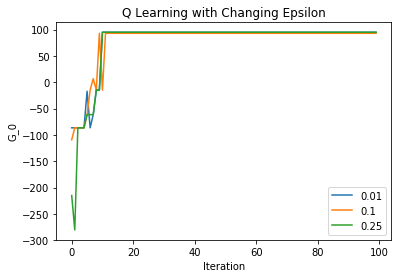

In [17]:
# Run Q Learning algo

# For each algorithm you implement, you should have another Python file that allows to
# run your experiment. Here, you will have to initialize your domain, and the algorithm
# with your parameter settings, and run your algorithm.

def initialize_plot():
    plt.plot()
    plt.ylabel('G_0')
    plt.xlabel('Iteration')
    plt.title("Q Learning with Changing Epsilon")
    return plt

# run Q Learning algo here

alpha = 0.3
gamma = 0.99
epsilon_rng = [0.01, 0.1, 0.25]
epsilon = 0.1

flags = Flags()
Q0_vals= {}
plt = initialize_plot()

for epsilon in epsilon_rng:
    q_learning = QLearning(flags, alpha, gamma, epsilon)
    progress = q_learning.train_trial()
    Q0_vals[epsilon] = progress
    plt.plot(Q0_vals[epsilon][:100], label = epsilon)


plt.legend()
plt.show()

In [13]:
q_learning.test_greedy()

state: (0, 5, 1), action: R
state: (0, 5, 2), action: R
state: (0, 5, 3), action: R
state: (0, 5, 4), action: U
state: (0, 4, 4), action: R
state: (1, 4, 5), action: U
state: (1, 3, 5), action: L
state: (1, 3, 4), action: U
state: (1, 2, 4), action: L
state: (1, 2, 3), action: L
state: (2, 2, 2), action: D
state: (2, 3, 2), action: D
state: (2, 4, 2), action: L
state: (3, 4, 1), action: R
state: (3, 4, 2), action: R
state: (3, 4, 3), action: R
state: (3, 4, 4), action: R
state: (3, 4, 5), action: D
state: (4, 5, 5), action: U
state: (4, 4, 5), action: U
state: (4, 3, 5), action: U
state: (4, 2, 5), action: U


94.90545791483345

# SARSA (On-Policy TD)
Implement the on-policy one-step Sarsa algorithm as discussed in class. You may fix the learning rate to alpha = 0.3 for all your experiments. Set gamma = 0.99, the maximum episode length to 200 time steps, and the number of episodes of training to 500. Experiment with epsilon in {0.01, 0.1, 0.25}, answer the same questions and provide the same information as Part B and C.
<img src="sarsa.png">

In [ ]:
# your code goes here
class Sarsa:
    def __init__(self, domain, alpha, gamma, epsilon):
    # sets the domain instance, and all relevant parameters for each algorithm 
    # (e.g. learning rate, epsilon, etc.).

    def initialize_values(self):
    # A procedure called initialize values that initializes the Q-values to zero for all
    # states in the MDP and all relevant other counters and memory.
    
    def sample_epsilon_greedy(self):
    # takes a state of the MDP as argument and returns an action sampled 
    # according to the epsilon-greedy policy defined by the epsilon parameter 
    # set in the init method and the Q-values.
    
    def test_greedy(self): 
    # generates an episode from the MDP using the greedy policy 
    # (we are testing, so please do NOT use the epsilon-greedy policy for this!) 
    # with respect to the current Q-values, and returns G0, the discounted return 
    # starting from the initial state (please refer to your lecture or tutorial notes). 
    # This function will be used to inspect the rate at which your algorithm 
    # converges to a good policy as it trains.
    
    def train_episode(self):
    # Each algorithm has a main training loop that generates an episode from the MDP
    # according to the epsilon-greedy policy and uses this to update the Q-values. 
    # How you implement this method is up to you, but it is easiest to refer to the pseudo-code
    # of each algorithm discussed in class or in the Sutton and Barto book.
    
    def train_trial(self):
    # Training typically does not only happen for one episode, but rather for many episodes. 
    # Create a function that first initializes your Q-values using your method initialize values,
    # and then proceeds to train using a predetermined number of episodes using your method train episode 
    # In addition, at the end of each episode, you should test the greedy policy you've obtained 
    # using your method test_greedy. 
    # Keep track of this progress in a list or a numpy array, and
    # return it in this procedure once training completes
    
    
    """
The algorithms in model-free RL are inherently random due to the randomness of
the exploration policy and possibly the stochasticity of the MDP (not relevant here,
since it is deterministic). In order to get a better idea of how fast each algorithm
converges, practitioners typically run each algorithm independently using the same
initial conditions many times (try to do it for at least 20 trials if you can: if your
computer is too slow, you may reduce it to 10), and average the results from all the
trials. In order to do this, you will have to run your method train trial many
times. Record the per-episode performance data returned by that method over all
trials. At the end, compute both the sample mean and standard deviation over trials
for each episode. Plot these result in separate figures with episode on the x-axis and
the mean/std of returns on the y-axis.
    """

In [ ]:
"""
For each algorithm you implement, you should have another Python file that allows to
run your experiment. Here, you will have to initialize your domain, and the algorithm
with your parameter settings, and run your algorithm.
"""

# TD(lambda)
Implement the on-policy TD(lambda) algorithm using traces as discussed in class. You may fix the learning rate to alpha = 0.3 for all your experiments and set the trace parameter to lambda = 0.9. Set gamma = 0.99, the maximum episode length to 200 time steps, and the number of episodes of training to 500. Experiment with epsilon in {0.01, 0.1, 0.25}, answer the same questions and provide the same information as Part B, C, D.
<img src="on-td-lambda.png">
<img src="tabularTD.png">

In [19]:
# your code goes here
class TdLambda:
    def __init__(self, domain, alpha, gamma, epsilon, lamda):
    # sets the domain instance, and all relevant parameters for each algorithm 
    # (e.g. learning rate, epsilon, etc.).
        self.domain = domain
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.lamda = lamda
        # Added this feature to represent whether this instance has been run, if so, print out the good policy
        self.final = False
        self.policy = []
    
    def initialize_values(self):
    # A procedure called initialize values that initializes the Q-values to zero for all
    # states in the MDP and all relevant other counters and memory.
        self.Q = {}
        self.e = {}
        for state in self.domain.get_all_states():
            self.Q[state] = {}
            self.e[state] = {}
            for action in self.domain.actions():
                self.Q[state][action] = 0
                self.e[state][action] = 0
                
    # Added this feature to represent whether this instance has been run, if so, print out the good policy
        self.final = False
        self.policy = []
    
    
    def sample_greedy(self, state):
        # if more than one action have the max value, select randomly from those top actions
        top = max(self.Q[state].values())
        topmoves = [k for k, v in self.Q[state].items() if v == top]
        greedy_a = random.choice(topmoves)
        return greedy_a
    
    def sample_epsilon_greedy(self):
    # takes a state of the MDP as argument and returns an action sampled 
    # according to the epsilon-greedy policy defined by the epsilon parameter 
    # set in the init method and the Q-values.
        choice = np.random.choice(['policy', 'rand'], p = [(1-self.epsilon), self.epsilon])
        if choice == 'policy':
            action = self.sample_greedy(self.state)
        else:
            action = random.choice(self.domain.actions())                
        return action  
    
    def test_greedy(self): 
    # generates an episode from the MDP using the greedy policy 
    # (we are testing, so please do NOT use the epsilon-greedy policy for this!) 
    # with respect to the current Q-values, and returns G0, the discounted return 
    # starting from the initial state (please refer to your lecture or tutorial notes). 
    # This function will be used to inspect the rate at which your algorithm 
    # converges to a good policy as it trains.
        self.state = self.domain.initial_state()
        terminal = False
        R = []
        i = 0
               
        # run the episode to collect data
        while not terminal and i < 200:
            S = self.state
            a = self.sample_greedy(S)
            
            # Added in a feature where it will print the policy out once the algo has been run
            print('state: ' + str(S) + ', action: ' + a) if self.final else ""
            S_next, reward = self.domain.transition(S, a)
            R.append(reward)
            self.state = S_next
            
            terminal = self.domain.is_terminal(self.state)
            i += 1
            
        # calculate G_0
        G_0 = 0      
        for i in range(len(R)):
            G_0 = G_0 + R[i]*pow(self.gamma, i)
        return G_0
    
    def train_episode(self):
    # Each algorithm has a main training loop that generates an episode from the MDP
    # according to the epsilon-greedy policy and uses this to update the Q-values. 
    # How you implement this method is up to you, but it is easiest to refer to the pseudo-code
    # of each algorithm discussed in class or in the Sutton and Barto book.
        self.state = self.domain.initial_state()
        terminal = False
        i = 0
        squiggle = 0
        
        S = self.state
        a = self.sample_epsilon_greedy()
        
        while (not terminal) and i < 200:     
            
            S_next, reward = self.domain.transition(S, a)
            self.state = S_next
            a_next = self.sample_epsilon_greedy()
            
            squiggle = reward + self.gamma*self.Q[S_next][a_next] - self.Q[S][a]
            self.e[S][a] += 1
            
            for state in self.domain.get_all_states():
                for action in self.domain.actions():
                    self.Q[state][action] += self.alpha * squiggle * self.e[state][action]
                    self.e[state][action]  = self.gamma * self.lamda * self.e[state][action]
            S = S_next
            a = a_next
            
            terminal = self.domain.is_terminal(self.state)
            i += 1
    
    def train_trial(self):
    # Training typically does not only happen for one episode, but rather for many episodes. 
    # Create a function that first initializes your Q-values using your method initialize values,
    # and then proceeds to train using a predetermined number of episodes using your method train episode 
    # In addition, at the end of each episode, you should test the greedy policy you've obtained 
    # using your method test_greedy. 
    # Keep track of this progress in a list or a numpy array, and
    # return it in this procedure once training completes
    
        self.initialize_values()
        progress = []
        
        for i in range(500):
            self.train_episode()
            Q_0 = self.test_greedy()
            progress.append(Q_0)
        self.final = True
        
        return progress
    
    """
The algorithms in model-free RL are inherently random due to the randomness of
the exploration policy and possibly the stochasticity of the MDP (not relevant here,
since it is deterministic). In order to get a better idea of how fast each algorithm
converges, practitioners typically run each algorithm independently using the same
initial conditions many times (try to do it for at least 20 trials if you can: if your
computer is too slow, you may reduce it to 10), and average the results from all the
trials. In order to do this, you will have to run your method train trial many
times. Record the per-episode performance data returned by that method over all
trials. At the end, compute both the sample mean and standard deviation over trials
for each episode. Plot these result in separate figures with episode on the x-axis and
the mean/std of returns on the y-axis.
    """

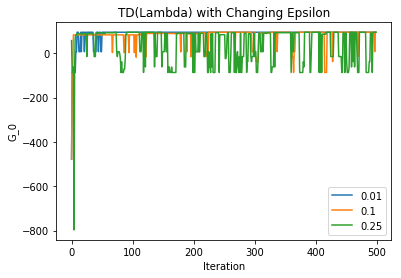

In [20]:
# For each algorithm you implement, you should have another Python file that allows to
# run your experiment. Here, you will have to initialize your domain, and the algorithm
# with your parameter settings, and run your algorithm.

def initialize_plot():
    plt.plot()
    plt.ylabel('G_0')
    plt.xlabel('Iteration')
    plt.title("TD(Lambda) with Changing Epsilon")
    return plt

# run Q Learning algo here

alpha = 0.3
gamma = 0.99
epsilon_rng = [0.01, 0.1, 0.25]
#epsilon = 0.01
lamda = 0.9

flags = Flags()
Q0_vals= {}
plt = initialize_plot()

for epsilon in epsilon_rng:
    td_lambda = TdLambda(flags, alpha, gamma, epsilon, lamda)
    progress = td_lambda.train_trial()
    Q0_vals[epsilon] = progress
    plt.plot(Q0_vals[epsilon], label = epsilon)


plt.legend()
plt.show()

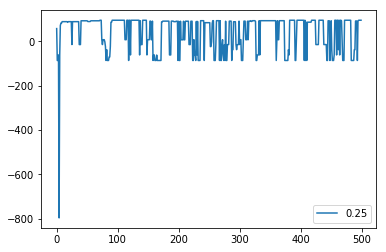

In [23]:
plt.plot(Q0_vals[epsilon], label = epsilon)


plt.legend()
plt.show()

In [21]:
td_lambda.Q[(4,5,4)]

{'U': 9.54507611774125,
 'D': 5.810534870876081,
 'L': 8.502049452156346,
 'R': 7.866744770704542}

In [22]:
td_lambda.test_greedy()

state: (0, 5, 1), action: R
state: (0, 5, 2), action: U
state: (0, 4, 2), action: R
state: (0, 4, 3), action: R
state: (0, 4, 4), action: R
state: (1, 4, 5), action: L
state: (1, 4, 4), action: U
state: (1, 3, 4), action: L
state: (1, 3, 3), action: L
state: (1, 3, 2), action: U
state: (2, 2, 2), action: L
state: (2, 2, 1), action: D
state: (2, 3, 1), action: D
state: (3, 4, 1), action: R
state: (3, 4, 2), action: R
state: (3, 4, 3), action: R
state: (3, 4, 4), action: D
state: (3, 5, 4), action: R
state: (4, 5, 5), action: U
state: (4, 4, 5), action: U
state: (4, 3, 5), action: U
state: (4, 2, 5), action: U


94.90545791483345

In [ ]:
t